In [1]:
import numpy as np
final_results = np.load('../Phoenix-2014T_results.npy', allow_pickle=True).item()
final_results["Refs"]

{'25October_2010_Monday_tagesschau-17': 'regen und schnee lassen an den alpen in der nacht nach im norden und nordosten fallen hier und da schauer sonst ist das klar .',
 '25October_2010_Monday_tagesschau-24': 'am donnerstag regen in der nordhälfte in der südhälfte mal sonne mal wolken ähnliches wetter dann auch am freitag .',
 '15December_2010_Wednesday_tagesschau-37': 'vom nordmeer zieht ein kräftiges tief heran und bringt uns ab den morgenstunden heftige schneefälle zum teil auch gefrierenden regen .',
 '10March_2011_Thursday_heute-58': 'sonnig geht es auch ins wochenende samstag ein herrlicher tag mit temperaturen bis siebzehn grad hier im westen .',
 '14August_2009_Friday_tagesschau-62': 'deutschland liegt morgen unter hochdruckeinfluss der die wolken weitgehend vertreibt .',
 '14August_2009_Friday_tagesschau-73': 'am sonntag im nordwesten eine mischung aus sonne und wolken mit einigen zum teil gewittrigen schauern .',
 '14August_2009_Friday_tagesschau-75': 'örtlich schauer oder g

In [19]:
# Define the file path
file_path = 'Modeling-Intensification-for-SLG/data/test.full'

# Initialize a list to store results
results = []

# Open the file and process line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Initialize the prosody score for the line
        prosody = 0
        
        # Count occurrences of <LOW-INT> and <HIGH-INT> and update the prosody score
        prosody += line.count('<LOW-INT>') * 1
        prosody += line.count('<HIGH-INT>') * 2
        
        # Store the line and its calculated prosody score
        results.append({'line': line.strip(), 'prosody': prosody})

Mean Prosody: 1.733644859813084
Median Prosody: 0.0

Count of each prosody value:
Value: 0, Count: 328
Value: 1, Count: 47
Value: 2, Count: 98
Value: 3, Count: 35
Value: 4, Count: 58
Value: 5, Count: 18
Value: 6, Count: 27
Value: 7, Count: 4
Value: 8, Count: 14
Value: 9, Count: 3
Value: 10, Count: 3
Value: 11, Count: 2
Value: 12, Count: 4
Value: 14, Count: 1


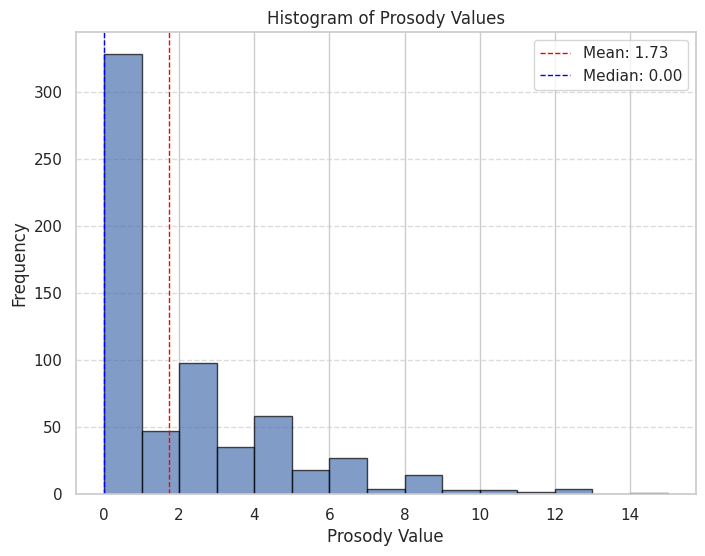

In [20]:
import statistics
from collections import Counter
import matplotlib.pyplot as plt

# Define the file path
file_path = 'Modeling-Intensification-for-SLG/data/test.full'

# Initialize a list to store prosody values
prosody_values = []

# Open the file and process line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Initialize the prosody score for the line
        prosody = 0
        
        # Count occurrences of <LOW-INT> and <HIGH-INT> and update the prosody score
        prosody += line.count('<LOW-INT>') * 1
        prosody += line.count('<HIGH-INT>') * 2
        
        # Append the prosody score to the list
        prosody_values.append(prosody)

# Calculate basic statistics
mean_prosody = statistics.mean(prosody_values)
median_prosody = statistics.median(prosody_values)
# Count the occurrences of each prosody value
value_counts = Counter(prosody_values)

# Print the results
print(f"Mean Prosody: {mean_prosody}")
print(f"Median Prosody: {median_prosody}")
print("\nCount of each prosody value:")
for value, count in sorted(value_counts.items()):
    print(f"Value: {value}, Count: {count}")

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(prosody_values, bins=range(min(prosody_values), max(prosody_values) + 2), edgecolor='black', alpha=0.7)
plt.title("Histogram of Prosody Values")
plt.xlabel("Prosody Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(mean_prosody, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_prosody:.2f}")
plt.axvline(median_prosody, color='blue', linestyle='dashed', linewidth=1, label=f"Median: {median_prosody:.2f}")
plt.legend()
plt.show()

Correlation Matrix:
            Prosody    BLEU-1    BLEU-2    BLEU-3    BLEU-4     ROUGE  \
Prosody    1.000000 -0.159628 -0.177831 -0.190528 -0.199833 -0.179211   
BLEU-1    -0.159628  1.000000  0.967637  0.904415  0.845178  0.977756   
BLEU-2    -0.177831  0.967637  1.000000  0.958192  0.903113  0.970432   
BLEU-3    -0.190528  0.904415  0.958192  1.000000  0.956864  0.917982   
BLEU-4    -0.199833  0.845178  0.903113  0.956864  1.000000  0.857470   
ROUGE     -0.179211  0.977756  0.970432  0.917982  0.857470  1.000000   
SignScore -0.003589  0.430301  0.410555  0.387502  0.369352  0.429690   

           SignScore  
Prosody    -0.003589  
BLEU-1      0.430301  
BLEU-2      0.410555  
BLEU-3      0.387502  
BLEU-4      0.369352  
ROUGE       0.429690  
SignScore   1.000000  


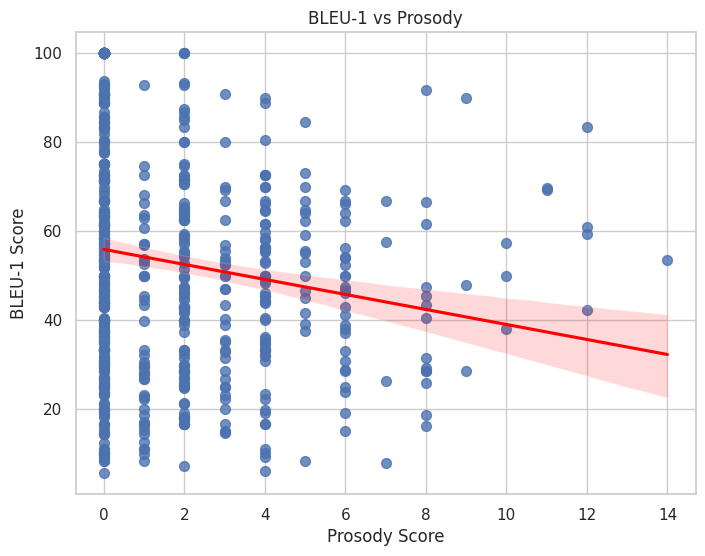

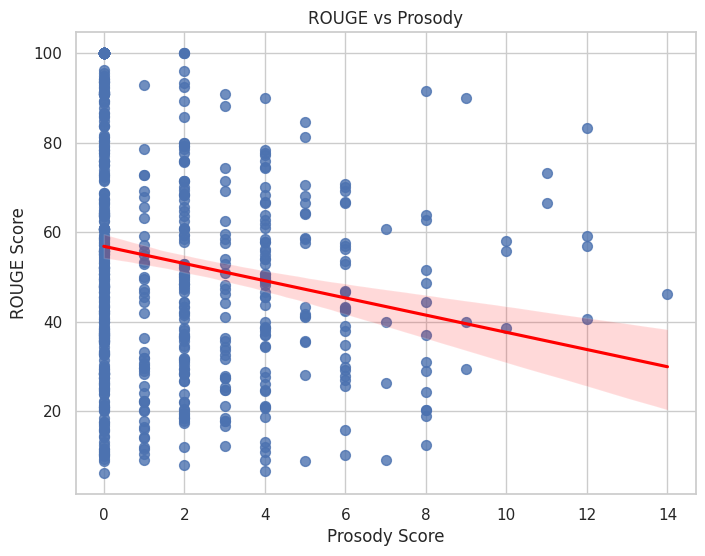

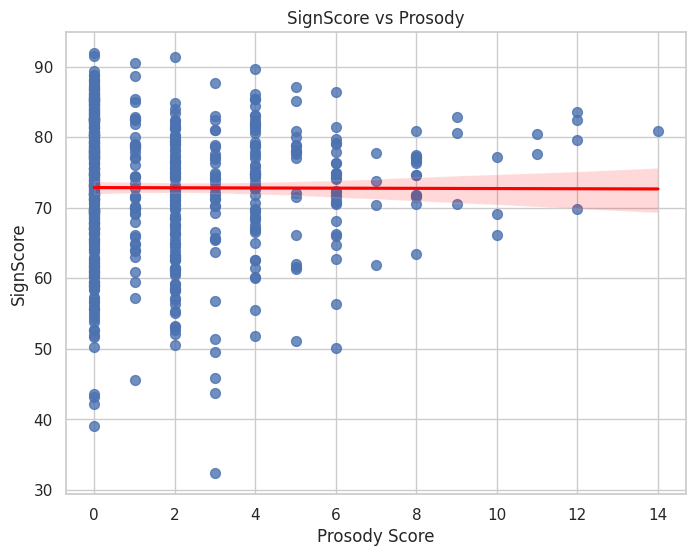

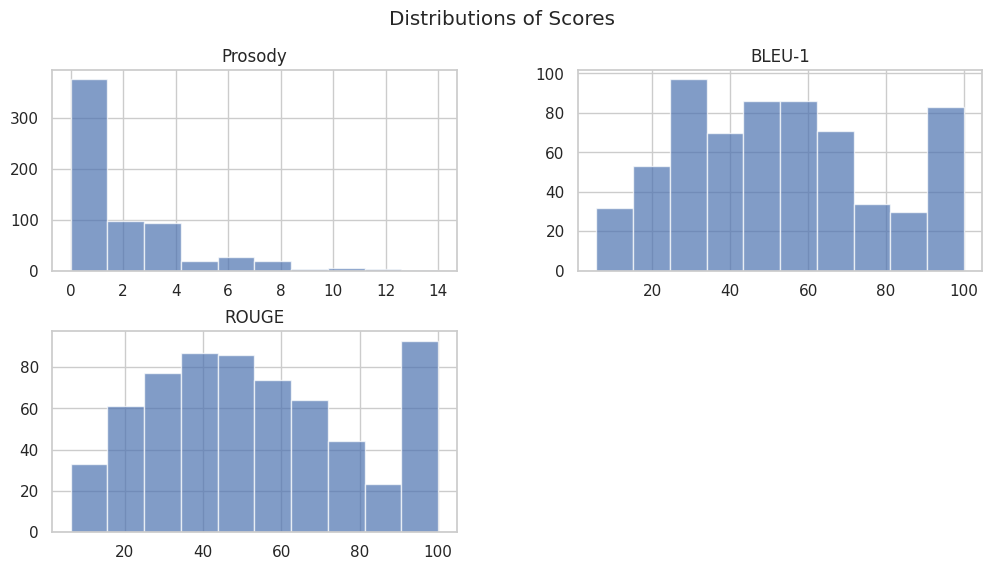

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

diagonal_bleu1_scores = [
    value['bleu1'] for key, value in final_results["metrics"]["bleu_scores"].items() if key[0] == key[1]
]
diagonal_bleu2_scores = [
    value['bleu2'] for key, value in final_results["metrics"]["bleu_scores"].items() if key[0] == key[1]
]
diagonal_bleu3_scores = [
    value['bleu3'] for key, value in final_results["metrics"]["bleu_scores"].items() if key[0] == key[1]
]
diagonal_bleu4_scores = [
    value['bleu4'] for key, value in final_results["metrics"]["bleu_scores"].items() if key[0] == key[1]
]
diagonal_rouge_scores = [
    value for key, value in final_results["metrics"]["rouge_scores"].items() if key[0] == key[1]
]

import pandas as pd

signscore = pd.read_csv("../../signscore/sign_score_data.csv")["same_scores_i2t"]

# Create a DataFrame
data = pd.DataFrame({
    'Prosody': prosody_values,
    'BLEU-1': diagonal_bleu1_scores,
    'BLEU-2': diagonal_bleu2_scores,
    'BLEU-3': diagonal_bleu3_scores,
    'BLEU-4': diagonal_bleu4_scores,
    'ROUGE': diagonal_rouge_scores,
    "SignScore": signscore
})

# Correlation Analysis
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization
sns.set(style="whitegrid")

# Scatter plot for BLEU-1 vs Prosody
plt.figure(figsize=(8, 6))
sns.regplot(x='Prosody', y='BLEU-1', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('BLEU-1 vs Prosody')
plt.xlabel('Prosody Score')
plt.ylabel('BLEU-1 Score')
plt.show()

# Scatter plot for ROUGE vs Prosody
plt.figure(figsize=(8, 6))
sns.regplot(x='Prosody', y='ROUGE', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('ROUGE vs Prosody')
plt.xlabel('Prosody Score')
plt.ylabel('ROUGE Score')
plt.show()

# Scatter plot for ROUGE vs Prosody
plt.figure(figsize=(8, 6))
sns.regplot(x='Prosody', y='SignScore', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('SignScore vs Prosody')
plt.xlabel('Prosody Score')
plt.ylabel('SignScore')
plt.show()

# Histogram of Prosody, BLEU-1, and ROUGE Scores
data[['Prosody', 'BLEU-1', 'ROUGE']].hist(bins=10, figsize=(12, 6), alpha=0.7)
plt.suptitle("Distributions of Scores")
plt.show()

In [22]:
from scipy.stats import pearsonr

# Example data
prosody = data['Prosody']
bleu1 = data['BLEU-1']
bleu2 = data['BLEU-2']
bleu3 = data['BLEU-3']
bleu4 = data['BLEU-4']
rouge = data['ROUGE']
signscore = data["SignScore"]

# Test correlation significance
correlations = {
    "Prosody vs BLEU-1": pearsonr(prosody, bleu1),
    "Prosody vs BLEU-2": pearsonr(prosody, bleu2),
    "Prosody vs BLEU-3": pearsonr(prosody, bleu3),
    "Prosody vs BLEU-4": pearsonr(prosody, bleu4),
    "Prosody vs ROUGE": pearsonr(prosody, rouge),
    "Prosody vs SignScore": pearsonr(prosody, signscore)
}

# Print results
for pair, (correlation, p_value) in correlations.items():
    print(f"{pair}: Correlation = {correlation:.3f}, p-value = {p_value:.3e}")

Prosody vs BLEU-1: Correlation = -0.160, p-value = 4.848e-05
Prosody vs BLEU-2: Correlation = -0.178, p-value = 5.809e-06
Prosody vs BLEU-3: Correlation = -0.191, p-value = 1.158e-06
Prosody vs BLEU-4: Correlation = -0.200, p-value = 3.308e-07
Prosody vs ROUGE: Correlation = -0.179, p-value = 4.901e-06
Prosody vs SignScore: Correlation = -0.004, p-value = 9.277e-01


Counts for Prosody Categories:
No Intensity      328
Low Intensity     238
High Intensity     76
Name: Prosody Category, dtype: int64


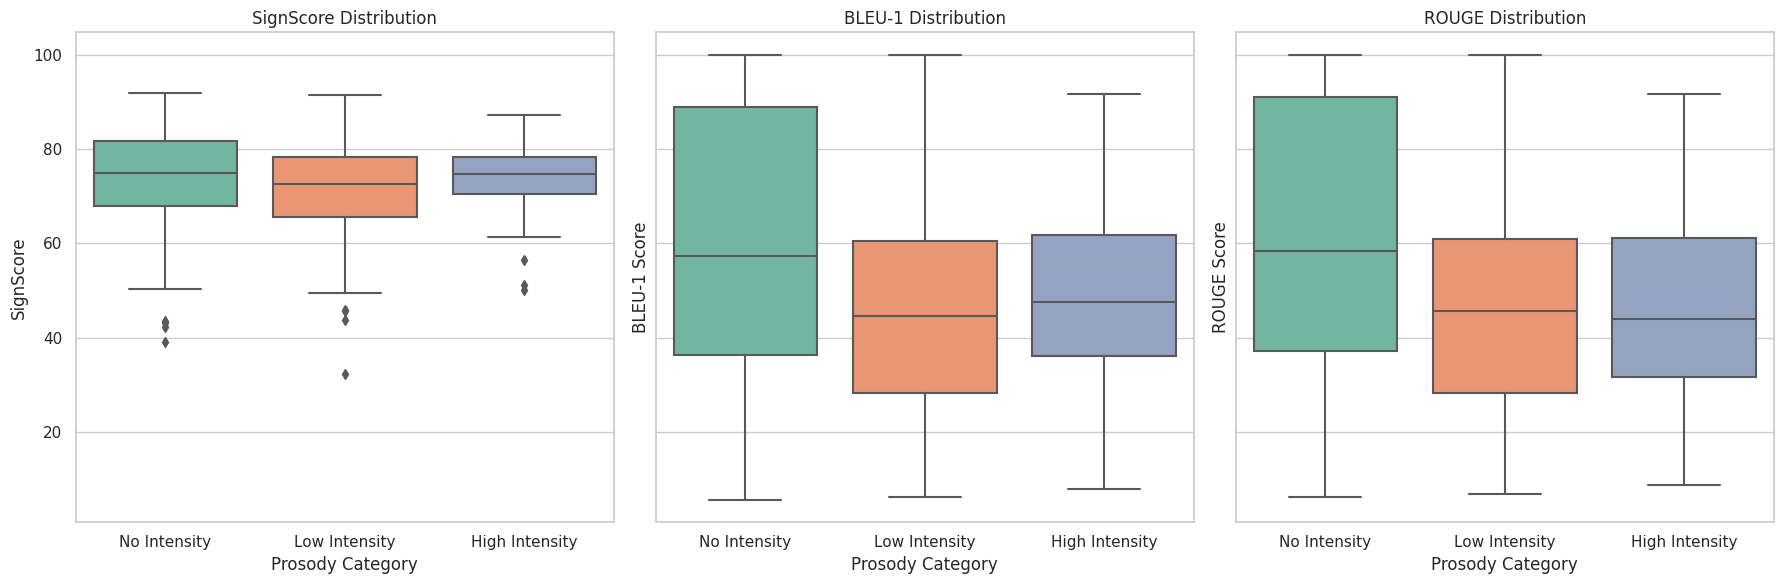

Summary Statistics by Prosody Category:
                   Prosody     BLEU-1     BLEU-2     BLEU-3     BLEU-4  \
Prosody Category                                                         
High Intensity    7.013158  47.985711  32.372679  21.738749  14.495500   
Low Intensity     2.436975  45.235975  30.460196  20.310758  13.679066   
No Intensity      0.000000  59.733276  48.423565  40.283421  34.273288   

                      ROUGE  SignScore  
Prosody Category                        
High Intensity    47.054946  73.617325  
Low Intensity     45.865419  71.321907  
No Intensity      60.617346  73.762652  


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

thresholds = {
    'no_intensity': 0,    # Value 0 corresponds to no intensity
    'low_intensity': range(1, 5),  # Values 1–4 correspond to low intensity
    'high_intensity': range(5, 15)  # Values 5 and above correspond to high intensity
}

# Function to map prosody scores to categories
def categorize_prosody(prosody_value):
    if prosody_value == thresholds['no_intensity']:
        return 'No Intensity'
    elif prosody_value in thresholds['low_intensity']:
        return 'Low Intensity'
    elif prosody_value in thresholds['high_intensity']:
        return 'High Intensity'
    else:
        return 'Unknown'

# Apply the function to categorize prosody values
data['Prosody Category'] = data['Prosody'].apply(categorize_prosody)

# Count of each category
prosody_counts = data['Prosody Category'].value_counts()
print("Counts for Prosody Categories:")
print(prosody_counts)

# Create subplots with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Boxplot for SignScore
sns.boxplot(ax=axes[0], x='Prosody Category', y='SignScore', data=data, palette='Set2')
axes[0].set_title('SignScore Distribution')
axes[0].set_xlabel('Prosody Category')
axes[0].set_ylabel('SignScore')

# Boxplot for BLEU-1
sns.boxplot(ax=axes[1], x='Prosody Category', y='BLEU-1', data=data, palette='Set2')
axes[1].set_title('BLEU-1 Distribution')
axes[1].set_xlabel('Prosody Category')
axes[1].set_ylabel('BLEU-1 Score')

# Boxplot for ROUGE
sns.boxplot(ax=axes[2], x='Prosody Category', y='ROUGE', data=data, palette='Set2')
axes[2].set_title('ROUGE Distribution')
axes[2].set_xlabel('Prosody Category')
axes[2].set_ylabel('ROUGE Score')

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics for each category
summary_stats = data.groupby('Prosody Category').mean()
print("Summary Statistics by Prosody Category:")
print(summary_stats)
